In [3]:
import pandas as pd
df=pd.read_csv('./중요변수추출.csv')
df

,credit_score,country,age_group_gender,balance_per_age,balance_per_tenure,salary_per_products,active_member,churn
0,619,France,forties_Female,2853.325952,39946.563333,101348.880,1,1
1,608,Spain,forties_Female,2044.094146,41903.930000,112542.580,1,0
2,502,France,forties_Female,3801.447619,17740.088889,37977.190,0,1
3,699,France,thirties_Female,3072.812564,59919.845000,46913.315,0,0
4,850,Spain,forties_Female,2918.856279,41836.940000,79084.100,1,0
...,...,...,...,...,...,...,...,...
9995,771,France,thirties_Male,3072.812564,19973.281667,48135.320,0,0
9996,516,France,thirties_Male,1639.131714,5215.419091,101699.770,1,0
9997,709,France,thirties_Female,3328.880278,14979.961250,42085.580,1,1
9998,772,Germany,forties_Male,1787.507381,18768.827500,46444.260,0,1


# map을 이용해 범주형 변수에 숫자 할당

In [4]:
df['country'].value_counts()

country
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [5]:
# country
# France     5014
# Germany    2509
# Spain      2477

In [6]:
df['country'] = df['country'].map({'France': 0, 'Spain': 1, 'Germany': 2})

In [7]:
len(df['age_group_gender'].unique())

17

In [8]:
df['age_group_gender'] = df['age_group_gender'].map({'teenager_Male': 0,'teenager_Female': 1,
                                                     'twenties_Male': 2,'twenties_Female': 3,
                                                     'thirties_Male': 4,'thirties_Female': 5,
                                                     'forties_Male': 6,'forties_Female': 7,
                                                     'fifties_Male': 8,'fifties_Female': 9,
                                                     'sixties_Male': 10,'sixties_Female': 11,
                                                     'seventies_Male': 12,'seventies_Female': 13,
                                                     'eighties_Male': 14,'eighties_Female': 15,
                                                     'nineties_Male': 16
                                                     })

In [9]:
df['age_group_gender'].value_counts()

age_group_gender
4     2462
5     1884
6     1371
7     1247
2      855
3      737
8      448
9      421
10     210
11     165
13      70
12      66
0       36
1       13
14       7
15       6
16       2
Name: count, dtype: int64

In [10]:
df

,credit_score,country,age_group_gender,balance_per_age,balance_per_tenure,salary_per_products,active_member,churn
0,619,0,7,2853.325952,39946.563333,101348.880,1,1
1,608,1,7,2044.094146,41903.930000,112542.580,1,0
2,502,0,7,3801.447619,17740.088889,37977.190,0,1
3,699,0,5,3072.812564,59919.845000,46913.315,0,0
4,850,1,7,2918.856279,41836.940000,79084.100,1,0
...,...,...,...,...,...,...,...,...
9995,771,0,4,3072.812564,19973.281667,48135.320,0,0
9996,516,0,4,1639.131714,5215.419091,101699.770,1,0
9997,709,0,5,3328.880278,14979.961250,42085.580,1,1
9998,772,2,6,1787.507381,18768.827500,46444.260,0,1


In [11]:
csv_filename = '맵을이용해서라벨인코딩.csv'
df.to_csv(csv_filename, index=False)

In [12]:
df

,credit_score,country,age_group_gender,balance_per_age,balance_per_tenure,salary_per_products,active_member,churn
0,619,0,7,2853.325952,39946.563333,101348.880,1,1
1,608,1,7,2044.094146,41903.930000,112542.580,1,0
2,502,0,7,3801.447619,17740.088889,37977.190,0,1
3,699,0,5,3072.812564,59919.845000,46913.315,0,0
4,850,1,7,2918.856279,41836.940000,79084.100,1,0
...,...,...,...,...,...,...,...,...
9995,771,0,4,3072.812564,19973.281667,48135.320,0,0
9996,516,0,4,1639.131714,5215.419091,101699.770,1,0
9997,709,0,5,3328.880278,14979.961250,42085.580,1,1
9998,772,2,6,1787.507381,18768.827500,46444.260,0,1


# 표준화

In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

cols_for_standard = df.columns.difference(['churn','country','age_group_gender','active_member'])

# 표준화
scaler = StandardScaler()

# 원핫인코딩이 완료된 데이터프레임 카피하기
df_standardized = df.copy()

# 카피한 데이터프레임에 표준화된 칼럼 붙여넣기
df_standardized[cols_for_standard] = scaler.fit_transform(df[cols_for_standard])

In [14]:
df_standardized

,credit_score,country,age_group_gender,balance_per_age,balance_per_tenure,salary_per_products,active_member,churn
0,-0.326221,0,7,-0.402237,0.439067,0.511633,1,1
1,-0.440036,1,7,-1.141788,0.517514,0.726664,1,0
2,-1.536794,0,7,0.464244,-0.450913,-0.705735,0,1
3,0.501521,0,5,-0.201650,1.239547,-0.534073,0,0
4,2.063884,1,7,-0.342349,0.514829,0.083927,1,0
...,...,...,...,...,...,...,...,...
9995,1.246488,0,4,-0.201650,-0.361412,-0.510598,0,0
9996,-1.391939,0,4,-1.511880,-0.952871,0.518374,1,0
9997,0.604988,0,5,0.032368,-0.561532,-0.626813,1,1
9998,1.256835,2,6,-1.376280,-0.409684,-0.543083,0,1


In [15]:
csv_filename = '맵을이용한라벨인코딩데이터프레임표준화.csv'
df_standardized.to_csv(csv_filename, index=False)

In [16]:
x = df_standardized[df_standardized.columns.difference(['churn'])]
y = df_standardized['churn']

In [17]:
x

,active_member,age_group_gender,balance_per_age,balance_per_tenure,country,credit_score,salary_per_products
0,1,7,-0.402237,0.439067,0,-0.326221,0.511633
1,1,7,-1.141788,0.517514,1,-0.440036,0.726664
2,0,7,0.464244,-0.450913,0,-1.536794,-0.705735
3,0,5,-0.201650,1.239547,0,0.501521,-0.534073
4,1,7,-0.342349,0.514829,1,2.063884,0.083927
...,...,...,...,...,...,...,...
9995,0,4,-0.201650,-0.361412,0,1.246488,-0.510598
9996,1,4,-1.511880,-0.952871,0,-1.391939,0.518374
9997,1,5,0.032368,-0.561532,0,0.604988,-0.626813
9998,0,6,-1.376280,-0.409684,2,1.256835,-0.543083


In [18]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: churn, Length: 10000, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# xgboost 랜덤 서치

In [25]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# 하이퍼파라미터 공간 정의
param_dist = {
    'n_estimators': randint(50, 500),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 15),
    'min_child_weight': randint(1, 10),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5)
}

# 랜덤 서치 설정
random_search = RandomizedSearchCV(
    xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    param_distributions=param_dist,
    n_iter=100,         # 시도할 조합의 수
    cv=5,              # 5-겹 교차 검증
    verbose=3,         # 진행 상황 출력
    n_jobs=-1,         # 모든 CPU 코어 사용
    random_state=42    # 재현성을 위해 랜덤 시드 설정
)

# 모델 학습
random_search.fit(x_train, y_train)

# 최적 하이퍼파라미터 및 성능 평가
print("Best parameters found: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:  {'colsample_bytree': 0.7860020996045916, 'learning_rate': 0.24056620429189268, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 55, 'subsample': 0.6850793501277221}
Best score:  0.8338750000000001


c:\Users\chaey\anaconda3\envs\prac_mldl\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:01:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


train accuracy:0.8417
test accuracy:0.8415
Precision: 0.6845
Recall: 0.3588
F1 Score: 0.4708
Confusion Matrix:
[[1542   65]
 [ 252  141]]
ROC AUC: 0.8038


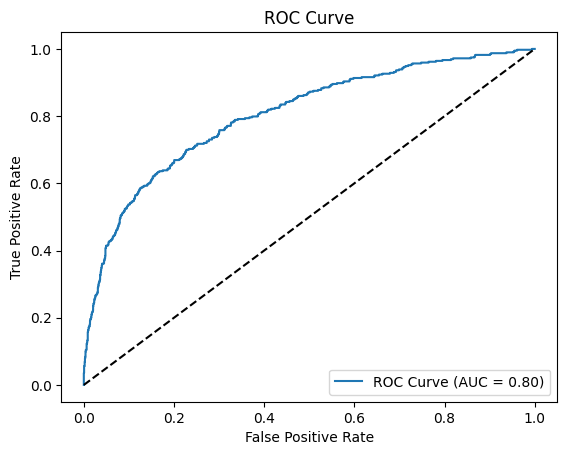

Cross-Validation Scores: [0.835  0.839  0.831  0.842  0.8295]
Mean CV Accuracy: 0.8353


In [26]:
from xgboost import XGBClassifier

xgb=XGBClassifier(random_state=42,
                  colsample_bytree=0.7860020996045916,
                  learning_rate=0.24056620429189268,
                  max_depth=3,
                  min_child_weight=5,
                  n_estimators=55,
                  subsample=0.6850793501277221
                  )

xgb.fit(x_train,y_train)

y_train_pred = xgb.predict(x_train)
print(f'train accuracy:{accuracy_score(y_train,y_train_pred):.4f}')

y_test_pred = xgb.predict(x_test)
print(f'test accuracy:{accuracy_score(y_test,y_test_pred):.4f}')

# ======================================================================================

y_pred_proba = xgb.predict_proba(x_test)[:, 1]  # ROC 곡선과 AUC를 위한 확률 예측값

# 1. 정밀도 (Precision)
precision = precision_score(y_test, y_test_pred)
print(f'Precision: {precision:.4f}')

# 2. 재현율 (Recall)
recall = recall_score(y_test, y_test_pred)
print(f'Recall: {recall:.4f}')

# 3. F1 점수
f1 = f1_score(y_test, y_test_pred)
print(f'F1 Score: {f1:.4f}')

# 4. 혼동 행렬 (Confusion Matrix)
cm = confusion_matrix(y_test, y_test_pred)
print(f'Confusion Matrix:\n{cm}')

# 5. ROC 곡선과 AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC: {auc:.4f}')

# ROC(Receiver Operating Characteristic) 곡선 플롯
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # 대각선 기준선
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 6. 교차 검증 (Cross Validation, Stratified KFold 사용)
cv = StratifiedKFold(n_splits=5)
cross_val_scores = cross_val_score(xgb, x, y, cv=cv, scoring='accuracy')
print(f'Cross-Validation Scores: {cross_val_scores}')
print(f'Mean CV Accuracy: {cross_val_scores.mean():.4f}')

# 모델 평가 결과로 데이터 프레임 만들기
data2 = {
    'Train Accuracy':[f'{accuracy_score(y_train,y_train_pred):.4f}'],
    'Test Accuracy':[f'{accuracy_score(y_test,y_test_pred):.4f}'],
    'Precision':[f'{precision:.4f}'],
    'Recall':[f'{recall:.4f}'],
    'F1 Score':[f'{f1:.4f}'],
    'Confusion Matrix':[f'{cm}'],
    'ROC AUC':[f'{auc:.4f}'],
    'Cross-Validation Scores':[f'{cross_val_scores}'],
    'Mean CV Accuracy':[f'{cross_val_scores.mean():.4f}']
}

df_xgb = pd.DataFrame(data2)

In [27]:
# 정규화, smote로 종속 변수 데이터 균형 맞추기

# 정규화

In [28]:
df

,credit_score,country,age_group_gender,balance_per_age,balance_per_tenure,salary_per_products,active_member,churn
0,619,0,7,2853.325952,39946.563333,101348.880,1,1
1,608,1,7,2044.094146,41903.930000,112542.580,1,0
2,502,0,7,3801.447619,17740.088889,37977.190,0,1
3,699,0,5,3072.812564,59919.845000,46913.315,0,0
4,850,1,7,2918.856279,41836.940000,79084.100,1,0
...,...,...,...,...,...,...,...,...
9995,771,0,4,3072.812564,19973.281667,48135.320,0,0
9996,516,0,4,1639.131714,5215.419091,101699.770,1,0
9997,709,0,5,3328.880278,14979.961250,42085.580,1,1
9998,772,2,6,1787.507381,18768.827500,46444.260,0,1


In [29]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 종속 변수만 제외하고 정규화
cols_for_minmax = df.columns.difference(['churn','country','age_group_gender','active_member'])

# 정규화
scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[cols_for_minmax] = scaler.fit_transform(df[cols_for_minmax])

In [30]:
df_normalized

,credit_score,country,age_group_gender,balance_per_age,balance_per_tenure,salary_per_products,active_member,churn
0,0.538,0,7,0.272722,0.196267,0.506790,1,1
1,0.516,1,7,0.192734,0.206282,0.562770,1,0
2,0.304,0,7,0.366438,0.082654,0.189867,0,1
3,0.698,0,5,0.294417,0.298455,0.234557,0,0
4,1.000,1,7,0.279199,0.205939,0.395443,1,0
...,...,...,...,...,...,...,...,...
9995,0.842,0,4,0.294417,0.094080,0.240668,0,0
9996,0.332,0,4,0.152706,0.018575,0.508545,1,0
9997,0.718,0,5,0.319728,0.068533,0.210413,1,1
9998,0.844,2,6,0.167372,0.087917,0.232211,0,1


In [31]:
csv_filename = '순서상관없는라벨인코딩하고정규화.csv'
df_normalized.to_csv(csv_filename, index=False)

# smote

In [32]:
x2 = df_normalized[df_normalized.columns.difference(['churn'])]
y2 = df_normalized['churn']

In [33]:
from collections import Counter
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x_data,y_data=sm.fit_resample(x2,y2)
print(Counter(y_data))

Counter({1: 7963, 0: 7963})


In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,
                                               test_size=0.2,random_state=42)

In [35]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# 하이퍼파라미터 공간 정의
param_dist = {
    'n_estimators': randint(50, 500),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 15),
    'min_child_weight': randint(1, 10),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5)
}

# 랜덤 서치 설정
random_search = RandomizedSearchCV(
    xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    param_distributions=param_dist,
    n_iter=100,         # 시도할 조합의 수
    cv=5,              # 5-겹 교차 검증
    verbose=3,         # 진행 상황 출력
    n_jobs=-1,         # 모든 CPU 코어 사용
    random_state=42    # 재현성을 위해 랜덤 시드 설정
)

# 모델 학습
random_search.fit(x_train, y_train)

# 최적 하이퍼파라미터 및 성능 평가
print("Best parameters found: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


c:\Users\chaey\anaconda3\envs\prac_mldl\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:04:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters found:  {'colsample_bytree': 0.8974056517708242, 'learning_rate': 0.16079112793155764, 'max_depth': 14, 'min_child_weight': 1, 'n_estimators': 366, 'subsample': 0.7495966899423762}
Best score:  0.8219780219780219


# smote, 정규화 이후 xgboost 랜덤 서치

train accuracy:1.0000
test accuracy:0.8057
Precision: 0.7817
Recall: 0.8345
F1 Score: 0.8072
Confusion Matrix:
[[1271  362]
 [ 257 1296]]
ROC AUC: 0.8892


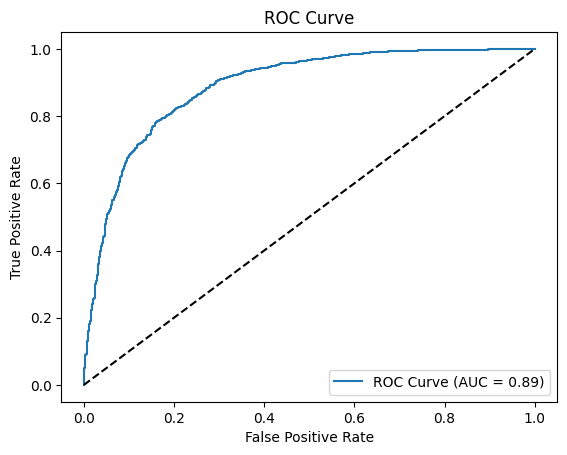

Cross-Validation Scores: [0.7658506  0.80816327 0.82825746 0.83045526 0.83610675]
Mean CV Accuracy: 0.8138


In [109]:
from xgboost import XGBClassifier

xgb=XGBClassifier(
    random_state=42,
    colsample_bytree=0.8974056517708242,
    learning_rate=0.16079112793155764,
    max_depth=14,
    min_child_weight=1,
    n_estimators=366,
    subsample=0.7495966899423762
                  )

xgb.fit(x_train,y_train)

y_train_pred = xgb.predict(x_train)
print(f'train accuracy:{accuracy_score(y_train,y_train_pred):.4f}')

y_test_pred = xgb.predict(x_test)
print(f'test accuracy:{accuracy_score(y_test,y_test_pred):.4f}')

# ======================================================================================

y_pred_proba = xgb.predict_proba(x_test)[:, 1]  # ROC 곡선과 AUC를 위한 확률 예측값

# 1. 정밀도 (Precision)
precision = precision_score(y_test, y_test_pred)
print(f'Precision: {precision:.4f}')

# 2. 재현율 (Recall)
recall = recall_score(y_test, y_test_pred)
print(f'Recall: {recall:.4f}')

# 3. F1 점수
f1 = f1_score(y_test, y_test_pred)
print(f'F1 Score: {f1:.4f}')

# 4. 혼동 행렬 (Confusion Matrix)
cm = confusion_matrix(y_test, y_test_pred)
print(f'Confusion Matrix:\n{cm}')

# 5. ROC 곡선과 AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC: {auc:.4f}')

# ROC(Receiver Operating Characteristic) 곡선 플롯
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # 대각선 기준선
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 6. 교차 검증 (Cross Validation, Stratified KFold 사용)
cv = StratifiedKFold(n_splits=5)
cross_val_scores = cross_val_score(xgb, x_data, y_data, cv=cv, scoring='accuracy')
print(f'Cross-Validation Scores: {cross_val_scores}')
print(f'Mean CV Accuracy: {cross_val_scores.mean():.4f}')

# 모델 평가 결과로 데이터 프레임 만들기
data2 = {
    'Train Accuracy':[f'{accuracy_score(y_train,y_train_pred):.4f}'],
    'Test Accuracy':[f'{accuracy_score(y_test,y_test_pred):.4f}'],
    'Precision':[f'{precision:.4f}'],
    'Recall':[f'{recall:.4f}'],
    'F1 Score':[f'{f1:.4f}'],
    'Confusion Matrix':[f'{cm}'],
    'ROC AUC':[f'{auc:.4f}'],
    'Cross-Validation Scores':[f'{cross_val_scores}'],
    'Mean CV Accuracy':[f'{cross_val_scores.mean():.4f}']
}

df_xgb = pd.DataFrame(data2)

In [110]:
df_xgb

,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,Confusion Matrix,ROC AUC,Cross-Validation Scores,Mean CV Accuracy
0,1.0000,0.8057,0.7817,0.8345,0.8072,[[1271 362]\n [ 257 1296]],0.8892,[0.7658506 0.80816327 0.82825746 0.83045526 0...,0.8138


# 랜덤 포레스트

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# 하이퍼파라미터 공간 정의
param_dist = {
    'n_estimators': randint(50, 500),
    'max_features': ['sqrt', 'log2'],
    'max_depth': randint(10, 100),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'bootstrap': [True, False]
}

# 랜덤 서치 설정
random_search = RandomizedSearchCV(
    RandomForestClassifier(),
    param_distributions=param_dist,
    n_iter=100,         # 시도할 조합의 수
    cv=5,              # 5-겹 교차 검증
    verbose=3,         # 진행 상황 출력
    n_jobs=-1,         # 모든 CPU 코어 사용
    random_state=42    # 재현성을 위해 랜덤 시드 설정
)

# 모델 학습
random_search.fit(x_train, y_train)

# 최적 하이퍼파라미터 및 성능 평가
print("Best parameters found: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:  {'bootstrap': False, 'max_depth': 96, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 452}
Best score:  0.8446624803767661


train accuracy:1.0000
test accuracy:0.8220
Precision: 0.8013
Recall: 0.8442
F1 Score: 0.8222
Confusion Matrix:
[[1308  325]
 [ 242 1311]]
ROC AUC: 0.9076


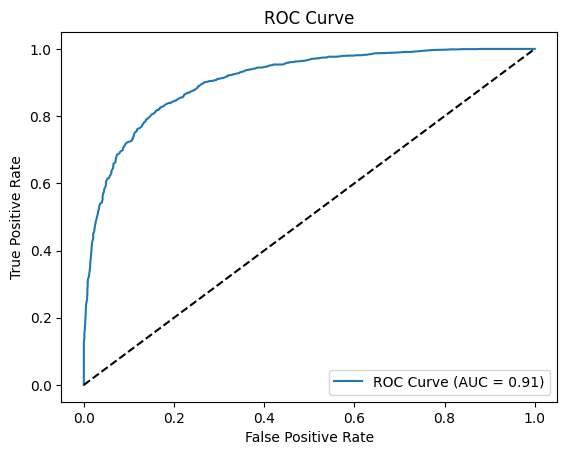

Cross-Validation Scores: [0.79315756 0.83139717 0.84144427 0.85023548 0.85086342]
Mean CV Accuracy: 0.8334


In [111]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42,
                            bootstrap=False,
                            max_depth=50,
                            max_features='sqrt',
                            min_samples_leaf=1,
                            min_samples_split=2,
                            n_estimators=376
                            )
rf.fit(x_train, y_train)

y_train_pred = rf.predict(x_train)
print(f'train accuracy:{accuracy_score(y_train,y_train_pred):.4f}')

y_test_pred = rf.predict(x_test)
print(f'test accuracy:{accuracy_score(y_test,y_test_pred):.4f}')

# ======================================================================================

y_pred_proba = rf.predict_proba(x_test)[:, 1]  # ROC 곡선과 AUC를 위한 확률 예측값

# 1. 정밀도 (Precision)
precision = precision_score(y_test, y_test_pred)
print(f'Precision: {precision:.4f}')

# 2. 재현율 (Recall)
recall = recall_score(y_test, y_test_pred)
print(f'Recall: {recall:.4f}')

# 3. F1 점수
f1 = f1_score(y_test, y_test_pred)
print(f'F1 Score: {f1:.4f}')

# 4. 혼동 행렬 (Confusion Matrix)
cm = confusion_matrix(y_test, y_test_pred)
print(f'Confusion Matrix:\n{cm}')

# 5. ROC 곡선과 AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC: {auc:.4f}')

# ROC(Receiver Operating Characteristic) 곡선 플롯
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # 대각선 기준선
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 6. 교차 검증 (Cross Validation, Stratified KFold 사용)
cv = StratifiedKFold(n_splits=5)
cross_val_scores = cross_val_score(rf, x_data, y_data, cv=cv, scoring='accuracy')
print(f'Cross-Validation Scores: {cross_val_scores}')
print(f'Mean CV Accuracy: {cross_val_scores.mean():.4f}')

# 모델 평가 결과로 데이터 프레임 만들기
data1 = {
    'Train Accuracy':[f'{accuracy_score(y_train,y_train_pred):.4f}'],
    'Test Accuracy':[f'{accuracy_score(y_test,y_test_pred):.4f}'],
    'Precision':[f'{precision:.4f}'],
    'Recall':[f'{recall:.4f}'],
    'F1 Score':[f'{f1:.4f}'],
    'Confusion Matrix':[f'{cm}'],
    'ROC AUC':[f'{auc:.4f}'],
    'Cross-Validation Scores':[f'{cross_val_scores}'],
    'Mean CV Accuracy':[f'{cross_val_scores.mean():.4f}']
}

df_rf = pd.DataFrame(data1)

In [114]:
df_rf

,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,Confusion Matrix,ROC AUC,Cross-Validation Scores,Mean CV Accuracy
0,1.0000,0.8220,0.8013,0.8442,0.8222,[[1308 325]\n [ 242 1311]],0.9076,[0.79315756 0.83139717 0.84144427 0.85023548 0...,0.8334


# 의사 결정 트리

In [41]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(1, 20),
    'min_samples_split': np.arange(2, 20),
    'min_samples_leaf': np.arange(1, 20)
}

# 랜덤 서치 설정
random_search = RandomizedSearchCV(
    DecisionTreeClassifier(),
    param_distributions=param_dist,
    n_iter=50,  # 샘플링할 조합의 수
    cv=5,  # 교차 검증 폴드 수
    verbose=1,  # 진행 상황 출력
    random_state=42
)

# 랜덤 서치 수행
random_search.fit(x_train, y_train)

# 최적 하이퍼파라미터 출력
print("Best parameters found: ", random_search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found:  {'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 16, 'criterion': 'entropy'}


train accuracy:0.8612
test accuracy:0.7335
Precision: 0.7298
Recall: 0.7199
F1 Score: 0.7248
Confusion Matrix:
[[1219  414]
 [ 435 1118]]
ROC AUC: 0.7753


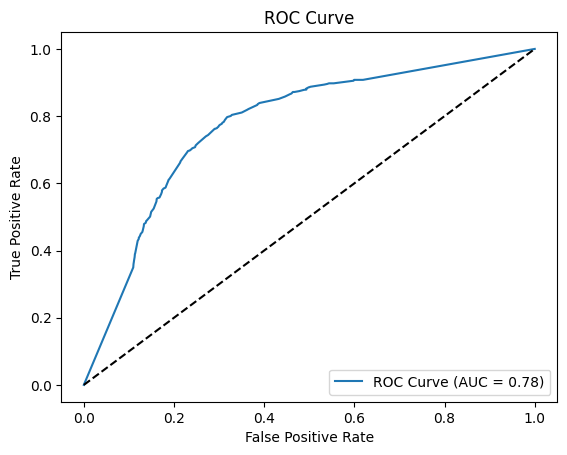

Cross-Validation Scores: [0.70056497 0.72087912 0.74631083 0.7400314  0.73437991]
Mean CV Accuracy: 0.7284


In [116]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

dt = DecisionTreeClassifier(
    random_state=42,
    min_samples_split=10,
    min_samples_leaf=1,
    max_depth=16,
    criterion='entropy'
    )

dt.fit(x_train,y_train)

y_train_pred = dt.predict(x_train)
print(f'train accuracy:{accuracy_score(y_train,y_train_pred):.4f}')

y_test_pred = dt.predict(x_test)
print(f'test accuracy:{accuracy_score(y_test,y_test_pred):.4f}')

# ======================================================================================

y_pred_proba = dt.predict_proba(x_test)[:, 1]  # ROC 곡선과 AUC를 위한 확률 예측값

# 1. 정밀도 (Precision)
precision = precision_score(y_test, y_test_pred)
print(f'Precision: {precision:.4f}')

# 2. 재현율 (Recall)
recall = recall_score(y_test, y_test_pred)
print(f'Recall: {recall:.4f}')

# 3. F1 점수
f1 = f1_score(y_test, y_test_pred)
print(f'F1 Score: {f1:.4f}')

# 4. 혼동 행렬 (Confusion Matrix)
cm = confusion_matrix(y_test, y_test_pred)
print(f'Confusion Matrix:\n{cm}')

# 5. ROC 곡선과 AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC: {auc:.4f}')

# ROC(Receiver Operating Characteristic) 곡선 플롯
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # 대각선 기준선
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 6. 교차 검증 (Cross Validation, Stratified KFold 사용)
cv = StratifiedKFold(n_splits=5)
cross_val_scores = cross_val_score(dt, x_data, y_data, cv=cv, scoring='accuracy')
print(f'Cross-Validation Scores: {cross_val_scores}')
print(f'Mean CV Accuracy: {cross_val_scores.mean():.4f}')

# 모델 평가 결과로 데이터 프레임 만들기
data3 = {
    'Train Accuracy':[f'{accuracy_score(y_train,y_train_pred):.4f}'],
    'Test Accuracy':[f'{accuracy_score(y_test,y_test_pred):.4f}'],
    'Precision':[f'{precision:.4f}'],
    'Recall':[f'{recall:.4f}'],
    'F1 Score':[f'{f1:.4f}'],
    'Confusion Matrix':[f'{cm}'],
    'ROC AUC':[f'{auc:.4f}'],
    'Cross-Validation Scores':[f'{cross_val_scores}'],
    'Mean CV Accuracy':[f'{cross_val_scores.mean():.4f}']
}

df_dt = pd.DataFrame(data3)

In [117]:
df_dt

,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,Confusion Matrix,ROC AUC,Cross-Validation Scores,Mean CV Accuracy
0,0.8612,0.7335,0.7298,0.7199,0.7248,[[1219 414]\n [ 435 1118]],0.7753,[0.70056497 0.72087912 0.74631083 0.7400314 0...,0.7284


# 로지스틱 회귀

In [120]:
from sklearn.linear_model import LogisticRegression

# 하이퍼파라미터 공간 정의
param_dist = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': np.logspace(-4, 4, 20),  # 정규화 강도를 조정하는 하이퍼파라미터
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'saga'],
    'max_iter': [100, 200, 300]
}

# 로지스틱 회귀 모델 생성
log_reg = LogisticRegression()

# 랜덤 서치 설정
random_search = RandomizedSearchCV(
    log_reg,
    param_distributions=param_dist,
    n_iter=50,  # 샘플링할 조합의 수
    cv=5,  # 교차 검증 폴드 수
    verbose=1,  # 진행 상황 출력
    random_state=42
)

# 랜덤 서치 수행
random_search.fit(x_train, y_train)

# 최적 하이퍼파라미터 출력
print("Best parameters found: ", random_search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found:  {'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 300, 'C': 0.00026366508987303583}


c:\Users\chaey\anaconda3\envs\prac_mldl\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
145 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
65 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\chaey\anaconda3\envs\prac_mldl\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\chaey\anaconda3\envs\prac_mldl\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\chaey\anaconda3\envs\prac_mldl\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_co

train accuracy:0.6926
test accuracy:0.6880
Precision: 0.6724
Recall: 0.7019
F1 Score: 0.6868
Confusion Matrix:
[[1102  531]
 [ 463 1090]]
ROC AUC: 0.7245


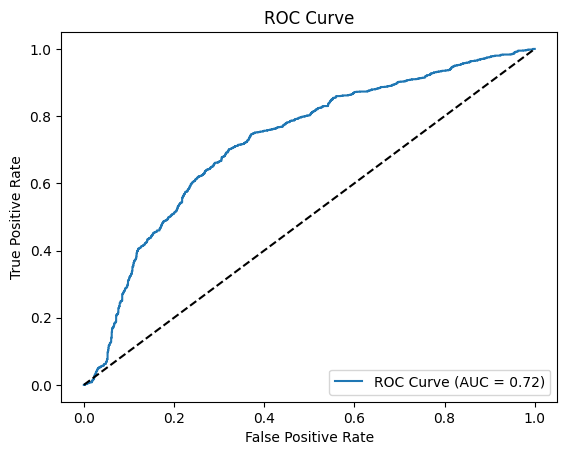

Cross-Validation Scores: [0.69491525 0.68854003 0.69293564 0.69324961 0.6866562 ]
Mean CV Accuracy: 0.6913


In [121]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 로지스틱 회귀 모델 초기화
lr = LogisticRegression(
    random_state=42,
    solver='newton-cg',
    penalty='l2',
    max_iter=200,
    C=0.0018329807108324356
    )

lr.fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
print(f'train accuracy:{accuracy_score(y_train,y_train_pred):.4f}')

y_test_pred = lr.predict(x_test)
print(f'test accuracy:{accuracy_score(y_test,y_test_pred):.4f}')

# ======================================================================================

y_pred_proba = lr.predict_proba(x_test)[:, 1]  # ROC 곡선과 AUC를 위한 확률 예측값

# 1. 정밀도 (Precision)
precision = precision_score(y_test, y_test_pred)
print(f'Precision: {precision:.4f}')

# 2. 재현율 (Recall)
recall = recall_score(y_test, y_test_pred)
print(f'Recall: {recall:.4f}')

# 3. F1 점수
f1 = f1_score(y_test, y_test_pred)
print(f'F1 Score: {f1:.4f}')

# 4. 혼동 행렬 (Confusion Matrix)
cm = confusion_matrix(y_test, y_test_pred)
print(f'Confusion Matrix:\n{cm}')

# 5. ROC 곡선과 AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC: {auc:.4f}')

# ROC(Receiver Operating Characteristic) 곡선 플롯
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # 대각선 기준선
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 6. 교차 검증 (Cross Validation, Stratified KFold 사용)
cv = StratifiedKFold(n_splits=5)
cross_val_scores = cross_val_score(lr, x_data, y_data, cv=cv, scoring='accuracy')
print(f'Cross-Validation Scores: {cross_val_scores}')
print(f'Mean CV Accuracy: {cross_val_scores.mean():.4f}')

# 모델 평가 결과로 데이터 프레임 만들기
data4 = {
    'Train Accuracy':[f'{accuracy_score(y_train,y_train_pred):.4f}'],
    'Test Accuracy':[f'{accuracy_score(y_test,y_test_pred):.4f}'],
    'Precision':[f'{precision:.4f}'],
    'Recall':[f'{recall:.4f}'],
    'F1 Score':[f'{f1:.4f}'],
    'Confusion Matrix':[f'{cm}'],
    'ROC AUC':[f'{auc:.4f}'],
    'Cross-Validation Scores':[f'{cross_val_scores}'],
    'Mean CV Accuracy':[f'{cross_val_scores.mean():.4f}']
}

df_lr = pd.DataFrame(data4)

In [122]:
df_lr

,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,Confusion Matrix,ROC AUC,Cross-Validation Scores,Mean CV Accuracy
0,0.6926,0.6880,0.6724,0.7019,0.6868,[[1102 531]\n [ 463 1090]],0.7245,[0.69491525 0.68854003 0.69293564 0.69324961 0...,0.6913


# support vector machine

In [48]:
from sklearn.svm import SVC
import numpy as np

# 하이퍼파라미터 공간 정의
param_dist = {
    'C': np.logspace(-2, 2, 5),  # 정규화 강도 범위 축소
    'gamma': np.logspace(-2, 2, 5),  # 커널 계수 범위 축소
    'kernel': ['linear', 'rbf'],  # 커널 함수 종류 제한
    'degree': [2, 3]  # 다항식 커널의 차수
}

# SVM 모델 생성
svm = SVC()

# 랜덤 서치 설정
random_search = RandomizedSearchCV(
    svm,
    param_distributions=param_dist,
    n_iter=20,  # 샘플링할 조합의 수 축소
    cv=3,  # 교차 검증 폴드 수 축소
    verbose=1,  # 진행 상황 출력
    random_state=42,
    n_jobs=-1  # 병렬 처리
)

# 랜덤 서치 수행
random_search.fit(x_train, y_train)

# 최적 하이퍼파라미터 출력
print("Best parameters found: ", random_search.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters found:  {'kernel': 'rbf', 'gamma': 10.0, 'degree': 3, 'C': 10.0}


train accuracy:0.7541
test accuracy:0.7141
Precision: 0.6969
Recall: 0.7315
F1 Score: 0.7138
Confusion Matrix:
[[1139  494]
 [ 417 1136]]
ROC AUC: 0.7245


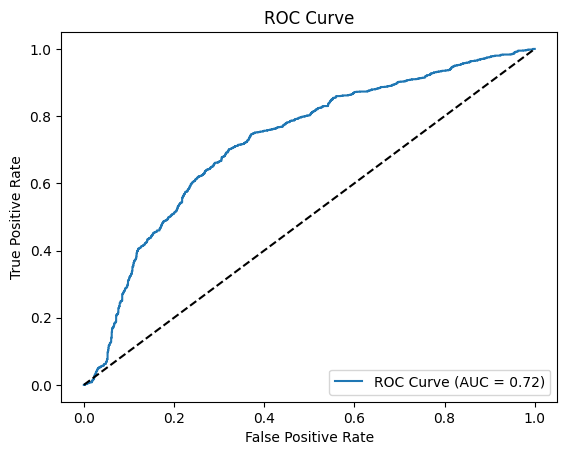

Cross-Validation Scores: [0.71688638 0.72527473 0.72464678 0.73124019 0.73155416]
Mean CV Accuracy: 0.7259


In [123]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# SVM 모델 초기화
svc = SVC(
    random_state=42,
    kernel='rbf',
    gamma=10.0,
    degree=3,
    C=10.0
    )

svc.fit(x_train,y_train)

y_train_pred = svc.predict(x_train)
print(f'train accuracy:{accuracy_score(y_train,y_train_pred):.4f}')

y_test_pred = svc.predict(x_test)
print(f'test accuracy:{accuracy_score(y_test,y_test_pred):.4f}')

# ======================================================================================

# y_pred_proba = svc.predict_proba(x_test)[:, 1]  # ROC 곡선과 AUC를 위한 확률 예측값

# 1. 정밀도 (Precision)
precision = precision_score(y_test, y_test_pred)
print(f'Precision: {precision:.4f}')

# 2. 재현율 (Recall)
recall = recall_score(y_test, y_test_pred)
print(f'Recall: {recall:.4f}')

# 3. F1 점수
f1 = f1_score(y_test, y_test_pred)
print(f'F1 Score: {f1:.4f}')

# 4. 혼동 행렬 (Confusion Matrix)
cm = confusion_matrix(y_test, y_test_pred)
print(f'Confusion Matrix:\n{cm}')

# 5. ROC 곡선과 AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC: {auc:.4f}')

# ROC(Receiver Operating Characteristic) 곡선 플롯
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # 대각선 기준선
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 6. 교차 검증 (Cross Validation, Stratified KFold 사용)
cv = StratifiedKFold(n_splits=5)
cross_val_scores = cross_val_score(svc, x_data, y_data, cv=cv, scoring='accuracy')
print(f'Cross-Validation Scores: {cross_val_scores}')
print(f'Mean CV Accuracy: {cross_val_scores.mean():.4f}')

# 모델 평가 결과로 데이터 프레임 만들기
data5 = {
    'Train Accuracy':[f'{accuracy_score(y_train,y_train_pred):.4f}'],
    'Test Accuracy':[f'{accuracy_score(y_test,y_test_pred):.4f}'],
    'Precision':[f'{precision:.4f}'],
    'Recall':[f'{recall:.4f}'],
    'F1 Score':[f'{f1:.4f}'],
    'Confusion Matrix':[f'{cm}'],
    'ROC AUC':[f'{auc:.4f}'],
    'Cross-Validation Scores':[f'{cross_val_scores}'],
    'Mean CV Accuracy':[f'{cross_val_scores.mean():.4f}']
}

df_svc = pd.DataFrame(data5)

In [50]:
df_svc

,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,Confusion Matrix,ROC AUC,Cross-Validation Scores,Mean CV Accuracy
0,0.8688,0.8004,0.7589,0.8654,0.8087,[[1206 427]\n [ 209 1344]],0.7609,[0.779 0.7785 0.7815 0.774 0.7855],0.7797


# artificial neural network

In [51]:
from sklearn.neural_network import MLPClassifier

# 하이퍼파라미터 공간 정의
param_dist = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50), (100, 100, 50)],  # 은닉층 크기
    'activation': ['tanh', 'relu'],  # 활성화 함수
    'solver': ['sgd', 'adam'],  # 최적화 알고리즘
    'alpha': np.logspace(-4, -1, 4),  # L2 규제 파라미터
    'learning_rate': ['constant', 'adaptive'],  # 학습률
}

# MLPClassifier 모델 생성
mlp = MLPClassifier(max_iter=200)

# 랜덤 서치 설정
random_search = RandomizedSearchCV(
    mlp, 
    param_distributions=param_dist, 
    n_iter=20,  # 샘플링할 조합의 수
    cv=3,  # 교차 검증 폴드 수
    verbose=1,  # 진행 상황 출력
    random_state=42, 
    n_jobs=-1  # 병렬 처리
)

# 랜덤 서치 수행
random_search.fit(x_train, y_train)

# 최적 하이퍼파라미터 출력
print("Best parameters found: ", random_search.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters found:  {'solver': 'adam', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (100, 100, 50), 'alpha': 0.001, 'activation': 'tanh'}


c:\Users\chaey\anaconda3\envs\prac_mldl\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


c:\Users\chaey\anaconda3\envs\prac_mldl\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


train accuracy:0.8236
test accuracy:0.7709
Precision: 0.7342
Recall: 0.8307
F1 Score: 0.7795
Confusion Matrix:
[[1166  467]
 [ 263 1290]]
ROC AUC: 0.8544


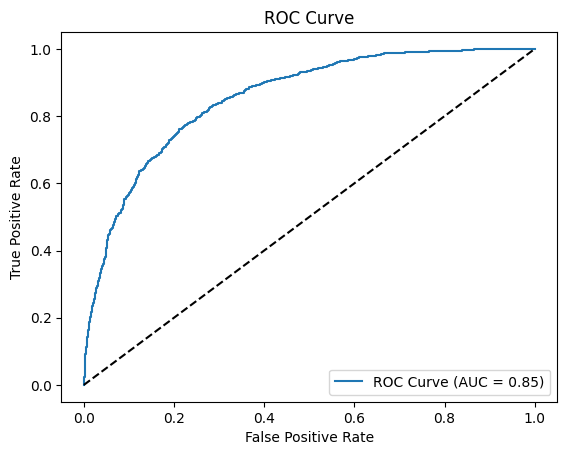

c:\Users\chaey\anaconda3\envs\prac_mldl\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\chaey\anaconda3\envs\prac_mldl\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\chaey\anaconda3\envs\prac_mldl\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\chaey\anaconda3\envs\prac_mldl\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Cross-Validation Scores: [0.8165 0.814  0.811  0.8165 0.8135]
Mean CV Accuracy: 0.8143


c:\Users\chaey\anaconda3\envs\prac_mldl\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [52]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 인공 신경망 모델 초기화
# hidden_layer_sizes는 각 은닉층의 뉴런 수를 설정
mlp = MLPClassifier(
    random_state=42,
    solver='adam',
    learning_rate='adaptive',
    hidden_layer_sizes=(100, 100, 50),
    alpha=0.001,
    activation='tanh'
    )

mlp.fit(x_train,y_train)

y_train_pred = mlp.predict(x_train)
print(f'train accuracy:{accuracy_score(y_train,y_train_pred):.4f}')

y_test_pred = mlp.predict(x_test)
print(f'test accuracy:{accuracy_score(y_test,y_test_pred):.4f}')

# ======================================================================================

y_pred_proba = mlp.predict_proba(x_test)[:, 1]  # ROC 곡선과 AUC를 위한 확률 예측값

# 1. 정밀도 (Precision)
precision = precision_score(y_test, y_test_pred)
print(f'Precision: {precision:.4f}')

# 2. 재현율 (Recall)
recall = recall_score(y_test, y_test_pred)
print(f'Recall: {recall:.4f}')

# 3. F1 점수
f1 = f1_score(y_test, y_test_pred)
print(f'F1 Score: {f1:.4f}')

# 4. 혼동 행렬 (Confusion Matrix)
cm = confusion_matrix(y_test, y_test_pred)
print(f'Confusion Matrix:\n{cm}')

# 5. ROC 곡선과 AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC: {auc:.4f}')

# ROC(Receiver Operating Characteristic) 곡선 플롯
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # 대각선 기준선
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 6. 교차 검증 (Cross Validation, Stratified KFold 사용)
cv = StratifiedKFold(n_splits=5)
cross_val_scores = cross_val_score(mlp, x, y, cv=cv, scoring='accuracy')
print(f'Cross-Validation Scores: {cross_val_scores}')
print(f'Mean CV Accuracy: {cross_val_scores.mean():.4f}')

# 모델 평가 결과로 데이터 프레임 만들기
data6 = {
    'Train Accuracy':[f'{accuracy_score(y_train,y_train_pred):.4f}'],
    'Test Accuracy':[f'{accuracy_score(y_test,y_test_pred):.4f}'],
    'Precision':[f'{precision:.4f}'],
    'Recall':[f'{recall:.4f}'],
    'F1 Score':[f'{f1:.4f}'],
    'Confusion Matrix':[f'{cm}'],
    'ROC AUC':[f'{auc:.4f}'],
    'Cross-Validation Scores':[f'{cross_val_scores}'],
    'Mean CV Accuracy':[f'{cross_val_scores.mean():.4f}']
}

df_mlp = pd.DataFrame(data6)

In [53]:
df_mlp

,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,Confusion Matrix,ROC AUC,Cross-Validation Scores,Mean CV Accuracy
0,0.8236,0.7709,0.7342,0.8307,0.7795,[[1166 467]\n [ 263 1290]],0.8544,[0.8165 0.814 0.811 0.8165 0.8135],0.8143


# lightgbm

In [54]:
import lightgbm as lgb

# 하이퍼파라미터 공간 정의
param_dist = {
    'num_leaves': np.arange(20, 150, 10),  # 트리의 최대 리프 노드 개수
    'learning_rate': np.logspace(-3, 0, 5),  # 학습률
    'n_estimators': np.arange(50, 500, 50),  # 트리 개수
    'max_depth': np.arange(3, 15, 2),  # 트리의 최대 깊이
    'min_child_samples': np.arange(10, 100, 10),  # 리프 노드가 가져야 하는 최소 샘플 수
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],  # 각 트리에 사용할 데이터 비율
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],  # 각 트리에 사용할 피처 비율
}

# LightGBM 모델 생성
lgb_model = lgb.LGBMClassifier()

# 랜덤 서치 설정
random_search = RandomizedSearchCV(
    lgb_model, 
    param_distributions=param_dist, 
    n_iter=20,  # 시도할 하이퍼파라미터 조합의 수
    cv=3,  # 교차 검증 폴드 수
    verbose=1,  # 진행 상황 출력
    random_state=42, 
    n_jobs=-1  # 병렬 처리
)

# 랜덤 서치 수행
random_search.fit(x_train, y_train)

# 최적 하이퍼파라미터 출력
print("Best parameters found: ", random_search.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[LightGBM] [Info] Number of positive: 6410, number of negative: 6330
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001211 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1042
[LightGBM] [Info] Number of data points in the train set: 12740, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503140 -> initscore=0.012559
[LightGBM] [Info] Start training from score 0.012559
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[LightGBM] [Info] Number of positive: 6410, number of negative: 6330
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000378 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1042
[LightGBM] [Info] Number of data points in the train set: 12740, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503140 -> initscore=0.012559
[LightGBM] [Info] Start training from score 0.012559
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

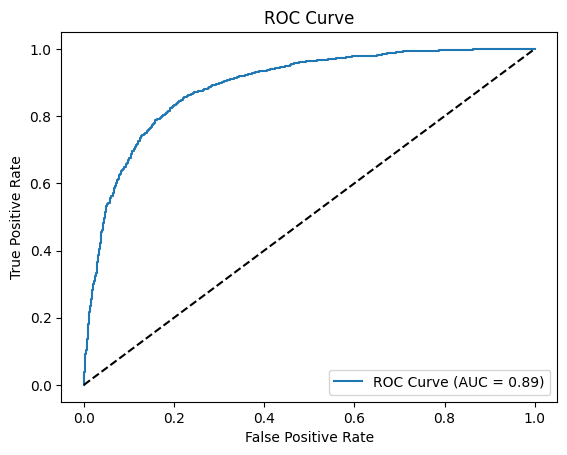

[LightGBM] [Info] Number of positive: 1629, number of negative: 6371
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000061 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1042
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203625 -> initscore=-1.363790
[LightGBM] [Info] Start training from score -1.363790
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

In [55]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(
    random_state=42,
    subsample=0.7,
    num_leaves=120,
    n_estimators=300,
    min_child_samples=50,
    max_depth=13,
    learning_rate=1.0,
    colsample_bytree=1.0
    )

lgbm.fit(x_train,y_train)

y_train_pred = lgbm.predict(x_train)
print(f'train accuracy:{accuracy_score(y_train,y_train_pred):.4f}')

y_test_pred = lgbm.predict(x_test)
print(f'test accuracy:{accuracy_score(y_test,y_test_pred):.4f}')

# ======================================================================================

y_pred_proba = lgbm.predict_proba(x_test)[:, 1]  # ROC 곡선과 AUC를 위한 확률 예측값

# 1. 정밀도 (Precision)
precision = precision_score(y_test, y_test_pred)
print(f'Precision: {precision:.4f}')

# 2. 재현율 (Recall)
recall = recall_score(y_test, y_test_pred)
print(f'Recall: {recall:.4f}')

# 3. F1 점수
f1 = f1_score(y_test, y_test_pred)
print(f'F1 Score: {f1:.4f}')

# 4. 혼동 행렬 (Confusion Matrix)
cm = confusion_matrix(y_test, y_test_pred)
print(f'Confusion Matrix:\n{cm}')

# 5. ROC 곡선과 AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC: {auc:.4f}')

# ROC(Receiver Operating Characteristic) 곡선 플롯
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # 대각선 기준선
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 6. 교차 검증 (Cross Validation, Stratified KFold 사용)
cv = StratifiedKFold(n_splits=5)
cross_val_scores = cross_val_score(lgbm, x, y, cv=cv, scoring='accuracy')
print(f'Cross-Validation Scores: {cross_val_scores}')
print(f'Mean CV Accuracy: {cross_val_scores.mean():.4f}')

# 모델 평가 결과로 데이터 프레임 만들기
data7 = {
    'Train Accuracy':[f'{accuracy_score(y_train,y_train_pred):.4f}'],
    'Test Accuracy':[f'{accuracy_score(y_test,y_test_pred):.4f}'],
    'Precision':[f'{precision:.4f}'],
    'Recall':[f'{recall:.4f}'],
    'F1 Score':[f'{f1:.4f}'],
    'Confusion Matrix':[f'{cm}'],
    'ROC AUC':[f'{auc:.4f}'],
    'Cross-Validation Scores':[f'{cross_val_scores}'],
    'Mean CV Accuracy':[f'{cross_val_scores.mean():.4f}']
}

df_lgbm = pd.DataFrame(data7)

In [56]:
df_lgbm

,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,Confusion Matrix,ROC AUC,Cross-Validation Scores,Mean CV Accuracy
0,1.0000,0.8145,0.7867,0.8500,0.8171,[[1275 358]\n [ 233 1320]],0.8902,[0.801 0.794 0.8005 0.7925 0.792 ],0.7960


# gradient boosting

In [57]:
from sklearn.ensemble import GradientBoostingClassifier

# 하이퍼파라미터 공간 정의
param_dist = {
    'n_estimators': np.arange(50, 400, 50),  # 트리의 개수
    'learning_rate': np.logspace(-3, 0, 4),  # 학습률
    'max_depth': np.arange(3, 10, 1),  # 트리의 최대 깊이
    'min_samples_split': np.arange(2, 10, 2),  # 내부 노드를 분할하는 데 필요한 최소 샘플 수
    'min_samples_leaf': np.arange(1, 10, 2),  # 리프 노드가 가져야 하는 최소 샘플 수
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],  # 각 트리에 사용할 데이터 비율
    'max_features': ['auto', 'sqrt', 'log2'],  # 각 트리에 사용할 피처 수
}

# Gradient Boosting 모델 생성
gbc = GradientBoostingClassifier()

# 랜덤 서치 설정
random_search = RandomizedSearchCV(
    gbc, 
    param_distributions=param_dist, 
    n_iter=20,  # 샘플링할 조합의 수
    cv=3,  # 교차 검증 폴드 수
    verbose=1,  # 진행 상황 출력
    random_state=42, 
    n_jobs=-1  # 병렬 처리
)

# 랜덤 서치 수행
random_search.fit(x_train, y_train)

# 최적 하이퍼파라미터 출력
print("Best parameters found: ", random_search.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


c:\Users\chaey\anaconda3\envs\prac_mldl\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
18 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\chaey\anaconda3\envs\prac_mldl\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\chaey\anaconda3\envs\prac_mldl\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\chaey\anaconda3\envs\prac_mldl\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_cons

Best parameters found:  {'subsample': 0.9, 'n_estimators': 250, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_features': 'log2', 'max_depth': 7, 'learning_rate': 1.0}


train accuracy:1.0000
test accuracy:0.8082
Precision: 0.7848
Recall: 0.8358
F1 Score: 0.8095
Confusion Matrix:
[[1277  356]
 [ 255 1298]]
ROC AUC: 0.8801


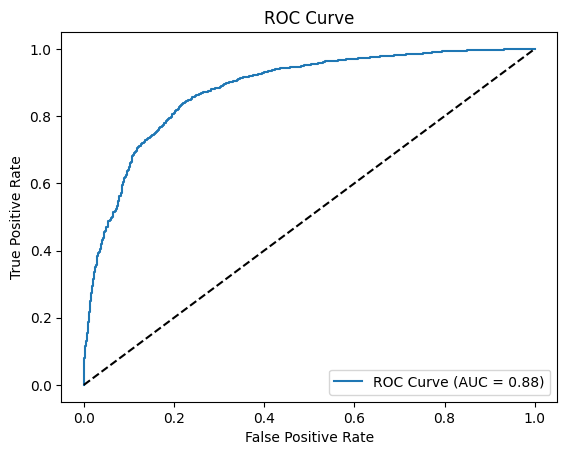

Cross-Validation Scores: [0.737  0.724  0.7405 0.7745 0.8   ]
Mean CV Accuracy: 0.7552


In [58]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(
    random_state=42,
    subsample=0.9,
    n_estimators=250,
    min_samples_split=2,
    min_samples_leaf=7,
    max_features='log2',
    max_depth=7,
    learning_rate=1.0                            
                                )

gb.fit(x_train,y_train)

y_train_pred = gb.predict(x_train)
print(f'train accuracy:{accuracy_score(y_train,y_train_pred):.4f}')

y_test_pred = gb.predict(x_test)
print(f'test accuracy:{accuracy_score(y_test,y_test_pred):.4f}')

# ======================================================================================

y_pred_proba = gb.predict_proba(x_test)[:, 1]  # ROC 곡선과 AUC를 위한 확률 예측값

# 1. 정밀도 (Precision)
precision = precision_score(y_test, y_test_pred)
print(f'Precision: {precision:.4f}')

# 2. 재현율 (Recall)
recall = recall_score(y_test, y_test_pred)
print(f'Recall: {recall:.4f}')

# 3. F1 점수
f1 = f1_score(y_test, y_test_pred)
print(f'F1 Score: {f1:.4f}')

# 4. 혼동 행렬 (Confusion Matrix)
cm = confusion_matrix(y_test, y_test_pred)
print(f'Confusion Matrix:\n{cm}')

# 5. ROC 곡선과 AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC: {auc:.4f}')

# ROC(Receiver Operating Characteristic) 곡선 플롯
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # 대각선 기준선
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 6. 교차 검증 (Cross Validation, Stratified KFold 사용)
cv = StratifiedKFold(n_splits=5)
cross_val_scores = cross_val_score(gb, x, y, cv=cv, scoring='accuracy')
print(f'Cross-Validation Scores: {cross_val_scores}')
print(f'Mean CV Accuracy: {cross_val_scores.mean():.4f}')

# 모델 평가 결과로 데이터 프레임 만들기
data8 = {
    'Train Accuracy':[f'{accuracy_score(y_train,y_train_pred):.4f}'],
    'Test Accuracy':[f'{accuracy_score(y_test,y_test_pred):.4f}'],
    'Precision':[f'{precision:.4f}'],
    'Recall':[f'{recall:.4f}'],
    'F1 Score':[f'{f1:.4f}'],
    'Confusion Matrix':[f'{cm}'],
    'ROC AUC':[f'{auc:.4f}'],
    'Cross-Validation Scores':[f'{cross_val_scores}'],
    'Mean CV Accuracy':[f'{cross_val_scores.mean():.4f}']
}

df_gb = pd.DataFrame(data8)

In [59]:
df_gb

,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,Confusion Matrix,ROC AUC,Cross-Validation Scores,Mean CV Accuracy
0,1.0000,0.8082,0.7848,0.8358,0.8095,[[1277 356]\n [ 255 1298]],0.8801,[0.737 0.724 0.7405 0.7745 0.8 ],0.7552


# naive bayes

In [60]:
from sklearn.naive_bayes import GaussianNB

# 하이퍼파라미터 공간 정의
param_dist = {
    'var_smoothing': np.logspace(0, -9, num=100)  # 1부터 10^(-9)까지의 값을 탐색
}

# GaussianNB 모델 생성
gnb = GaussianNB()

# 랜덤 서치 설정
random_search = RandomizedSearchCV(
    gnb, 
    param_distributions=param_dist, 
    n_iter=20,  # 시도할 하이퍼파라미터 조합 수
    cv=3,  # 교차 검증 폴드 수
    verbose=1,  # 진행 상황 출력
    random_state=42, 
    n_jobs=-1  # 병렬 처리
)

# 랜덤 서치 수행
random_search.fit(x_train, y_train)

# 최적 하이퍼파라미터 출력
print("Best parameters found: ", random_search.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters found:  {'var_smoothing': 0.02310129700083159}


train accuracy:0.7054
test accuracy:0.7166
Precision: 0.7026
Recall: 0.7257
F1 Score: 0.7140
Confusion Matrix:
[[1156  477]
 [ 426 1127]]
ROC AUC: 0.7644


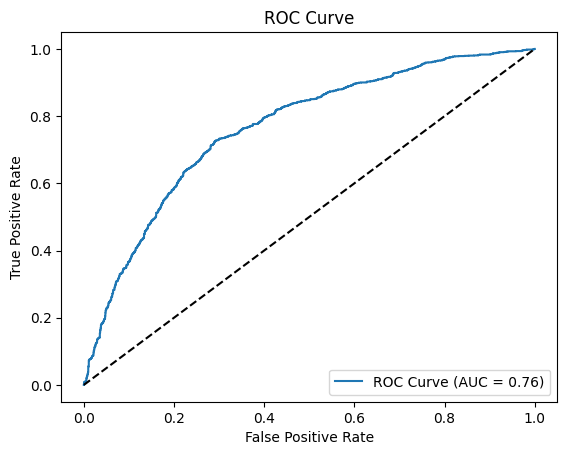

Cross-Validation Scores: [0.798  0.7985 0.7995 0.813  0.8015]
Mean CV Accuracy: 0.8021


In [62]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB(
    var_smoothing=0.02310129700083159
                )

nb.fit(x_train,y_train)

y_train_pred = nb.predict(x_train)
print(f'train accuracy:{accuracy_score(y_train,y_train_pred):.4f}')

y_test_pred = nb.predict(x_test)
print(f'test accuracy:{accuracy_score(y_test,y_test_pred):.4f}')

# ======================================================================================

y_pred_proba = nb.predict_proba(x_test)[:, 1]  # ROC 곡선과 AUC를 위한 확률 예측값

# 1. 정밀도 (Precision)
precision = precision_score(y_test, y_test_pred)
print(f'Precision: {precision:.4f}')

# 2. 재현율 (Recall)
recall = recall_score(y_test, y_test_pred)
print(f'Recall: {recall:.4f}')

# 3. F1 점수
f1 = f1_score(y_test, y_test_pred)
print(f'F1 Score: {f1:.4f}')

# 4. 혼동 행렬 (Confusion Matrix)
cm = confusion_matrix(y_test, y_test_pred)
print(f'Confusion Matrix:\n{cm}')

# 5. ROC 곡선과 AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC: {auc:.4f}')

# ROC(Receiver Operating Characteristic) 곡선 플롯
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # 대각선 기준선
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 6. 교차 검증 (Cross Validation, Stratified KFold 사용)
cv = StratifiedKFold(n_splits=5)
cross_val_scores = cross_val_score(nb, x, y, cv=cv, scoring='accuracy')
print(f'Cross-Validation Scores: {cross_val_scores}')
print(f'Mean CV Accuracy: {cross_val_scores.mean():.4f}')

# 모델 평가 결과로 데이터 프레임 만들기
data9 = {
    'Train Accuracy':[f'{accuracy_score(y_train,y_train_pred):.4f}'],
    'Test Accuracy':[f'{accuracy_score(y_test,y_test_pred):.4f}'],
    'Precision':[f'{precision:.4f}'],
    'Recall':[f'{recall:.4f}'],
    'F1 Score':[f'{f1:.4f}'],
    'Confusion Matrix':[f'{cm}'],
    'ROC AUC':[f'{auc:.4f}'],
    'Cross-Validation Scores':[f'{cross_val_scores}'],
    'Mean CV Accuracy':[f'{cross_val_scores.mean():.4f}']
}

df_nb = pd.DataFrame(data9)

In [63]:
df_nb

,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,Confusion Matrix,ROC AUC,Cross-Validation Scores,Mean CV Accuracy
0,0.7054,0.7166,0.7026,0.7257,0.7140,[[1156 477]\n [ 426 1127]],0.7644,[0.798 0.7985 0.7995 0.813 0.8015],0.8021


# catboost

In [64]:
from catboost import CatBoostClassifier

# 하이퍼파라미터 공간 정의
param_dist = {
    'depth': np.arange(4, 10),  # 트리의 깊이
    'learning_rate': np.logspace(-3, 0, 10),  # 학습률
    'iterations': np.arange(100, 1000, 100),  # 트리의 개수
    'l2_leaf_reg': np.logspace(-2, 2, 10),  # L2 정규화 계수
    'border_count': np.arange(32, 256, 32)  # 정렬 경계의 수 (트리 분할에 사용됨)
}

# CatBoostClassifier 모델 생성
catboost_model = CatBoostClassifier(verbose=0)

# 랜덤 서치 설정
random_search = RandomizedSearchCV(
    catboost_model, 
    param_distributions=param_dist, 
    n_iter=20,  # 시도할 하이퍼파라미터 조합 수
    cv=3,  # 교차 검증 폴드 수
    verbose=1,  # 진행 상황 출력
    random_state=42,
    n_jobs=-1  # 병렬 처리
)

# 랜덤 서치 수행
random_search.fit(x_train, y_train)

# 최적 하이퍼파라미터 출력
print("Best parameters found: ", random_search.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters found:  {'learning_rate': 0.46415888336127775, 'l2_leaf_reg': 1.6681005372000592, 'iterations': 500, 'depth': 8, 'border_count': 160}


0:	learn: 0.5840102	total: 19.4ms	remaining: 9.68s
1:	learn: 0.5475490	total: 34.4ms	remaining: 8.57s
2:	learn: 0.5300640	total: 47ms	remaining: 7.79s
3:	learn: 0.5189914	total: 58.6ms	remaining: 7.27s
4:	learn: 0.5065212	total: 72.2ms	remaining: 7.15s
5:	learn: 0.5011966	total: 89.5ms	remaining: 7.37s
6:	learn: 0.4932862	total: 109ms	remaining: 7.68s
7:	learn: 0.4870635	total: 124ms	remaining: 7.61s
8:	learn: 0.4799009	total: 138ms	remaining: 7.54s
9:	learn: 0.4733412	total: 152ms	remaining: 7.47s
10:	learn: 0.4656066	total: 168ms	remaining: 7.45s
11:	learn: 0.4566553	total: 188ms	remaining: 7.66s
12:	learn: 0.4516883	total: 206ms	remaining: 7.72s
13:	learn: 0.4477721	total: 220ms	remaining: 7.64s
14:	learn: 0.4426106	total: 230ms	remaining: 7.43s
15:	learn: 0.4373998	total: 241ms	remaining: 7.28s
16:	learn: 0.4339523	total: 252ms	remaining: 7.16s
17:	learn: 0.4273528	total: 266ms	remaining: 7.12s
18:	learn: 0.4224087	total: 276ms	remaining: 6.99s
19:	learn: 0.4182358	total: 290ms	rem

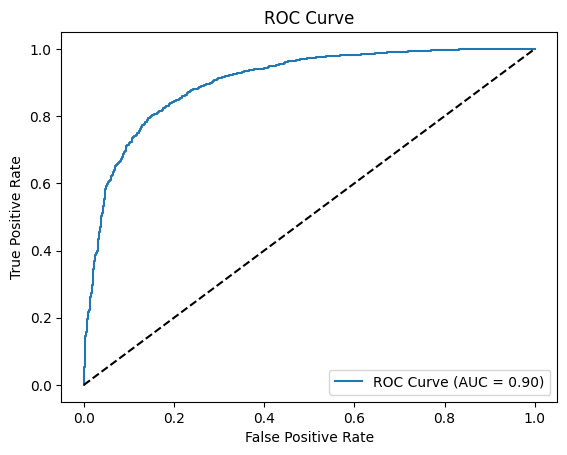

0:	learn: 0.4747339	total: 7.32ms	remaining: 3.65s
1:	learn: 0.4213970	total: 11.5ms	remaining: 2.86s
2:	learn: 0.4011118	total: 16.6ms	remaining: 2.74s
3:	learn: 0.3893652	total: 24.4ms	remaining: 3.03s
4:	learn: 0.3799736	total: 29.2ms	remaining: 2.89s
5:	learn: 0.3706938	total: 33.9ms	remaining: 2.79s
6:	learn: 0.3656318	total: 43ms	remaining: 3.03s
7:	learn: 0.3595115	total: 49.2ms	remaining: 3.03s
8:	learn: 0.3565117	total: 57.4ms	remaining: 3.13s
9:	learn: 0.3517128	total: 62.3ms	remaining: 3.05s
10:	learn: 0.3485373	total: 68.1ms	remaining: 3.02s
11:	learn: 0.3443774	total: 75.4ms	remaining: 3.06s
12:	learn: 0.3415251	total: 80ms	remaining: 3s
13:	learn: 0.3372093	total: 86.9ms	remaining: 3.02s
14:	learn: 0.3301500	total: 91.8ms	remaining: 2.97s
15:	learn: 0.3278844	total: 96ms	remaining: 2.9s
16:	learn: 0.3224255	total: 103ms	remaining: 2.92s
17:	learn: 0.3181678	total: 108ms	remaining: 2.89s
18:	learn: 0.3130174	total: 112ms	remaining: 2.84s
19:	learn: 0.3089648	total: 121ms	r

In [65]:
from catboost import CatBoostClassifier, Pool

cb = CatBoostClassifier(
    random_state=42,
    learning_rate=0.46415888336127775,
    l2_leaf_reg=1.6681005372000592,
    iterations=500,
    depth=8,
    border_count=160
)

cb.fit(x_train,y_train)

y_train_pred = cb.predict(x_train)
print(f'train accuracy:{accuracy_score(y_train,y_train_pred):.4f}')

y_test_pred = cb.predict(x_test)
print(f'test accuracy:{accuracy_score(y_test,y_test_pred):.4f}')

# ======================================================================================

y_pred_proba = cb.predict_proba(x_test)[:, 1]  # ROC 곡선과 AUC를 위한 확률 예측값

# 1. 정밀도 (Precision)
precision = precision_score(y_test, y_test_pred)
print(f'Precision: {precision:.4f}')

# 2. 재현율 (Recall)
recall = recall_score(y_test, y_test_pred)
print(f'Recall: {recall:.4f}')

# 3. F1 점수
f1 = f1_score(y_test, y_test_pred)
print(f'F1 Score: {f1:.4f}')

# 4. 혼동 행렬 (Confusion Matrix)
cm = confusion_matrix(y_test, y_test_pred)
print(f'Confusion Matrix:\n{cm}')

# 5. ROC 곡선과 AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC: {auc:.4f}')

# ROC(Receiver Operating Characteristic) 곡선 플롯
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # 대각선 기준선
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 6. 교차 검증 (Cross Validation, Stratified KFold 사용)
cv = StratifiedKFold(n_splits=5)
cross_val_scores = cross_val_score(cb, x, y, cv=cv, scoring='accuracy')
print(f'Cross-Validation Scores: {cross_val_scores}')
print(f'Mean CV Accuracy: {cross_val_scores.mean():.4f}')

# 모델 평가 결과로 데이터 프레임 만들기
data10 = {
    'Train Accuracy':[f'{accuracy_score(y_train,y_train_pred):.4f}'],
    'Test Accuracy':[f'{accuracy_score(y_test,y_test_pred):.4f}'],
    'Precision':[f'{precision:.4f}'],
    'Recall':[f'{recall:.4f}'],
    'F1 Score':[f'{f1:.4f}'],
    'Confusion Matrix':[f'{cm}'],
    'ROC AUC':[f'{auc:.4f}'],
    'Cross-Validation Scores':[f'{cross_val_scores}'],
    'Mean CV Accuracy':[f'{cross_val_scores.mean():.4f}']
}

df_cb = pd.DataFrame(data10)

In [66]:
df_cb

,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,Confusion Matrix,ROC AUC,Cross-Validation Scores,Mean CV Accuracy
0,1.0000,0.8164,0.7844,0.8596,0.8203,[[1266 367]\n [ 218 1335]],0.9021,[0.8055 0.812 0.818 0.815 0.8085],0.8118


# 평가 지표 데이터프레임 concat

In [72]:
import pandas as pd

# 행 방향으로 병합 (위아래로 연결)
result = pd.concat(
    [df_rf, df_xgb, df_dt, df_lr, df_svc, df_mlp, df_lgbm, df_gb, df_nb, df_cb],
    axis=0,
    ignore_index=True
    )

new_index = ['radom_forest','xgboost','decision_tree','logistic_regression','svc',
             'ann','lightgbm','gradient_boosting','naive_bayes','catboost',]

result.index=new_index

result

,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,Confusion Matrix,ROC AUC,Cross-Validation Scores,Mean CV Accuracy
radom_forest,1.0000,0.8503,0.8388,0.8577,0.8481,[[1377 256]\n [ 221 1332]],0.9312,[0.817 0.823 0.8165 0.826 0.817 ],0.8199
xgboost,1.0000,0.8239,0.8006,0.8506,0.8249,[[1304 329]\n [ 232 1321]],0.9112,[0.8155 0.8185 0.8185 0.8165 0.816 ],0.8170
decision_tree,0.9087,0.7649,0.7541,0.7682,0.7611,[[1244 389]\n [ 360 1193]],0.8037,[0.7775 0.7755 0.7775 0.7915 0.774 ],0.7792
logistic_regression,0.7020,0.7078,0.6968,0.7090,0.7028,[[1154 479]\n [ 452 1101]],0.7609,[0.795 0.7915 0.7885 0.7965 0.7915],0.7926
svc,0.8688,0.8004,0.7589,0.8654,0.8087,[[1206 427]\n [ 209 1344]],0.7609,[0.779 0.7785 0.7815 0.774 0.7855],0.7797
ann,0.8236,0.7709,0.7342,0.8307,0.7795,[[1166 467]\n [ 263 1290]],0.8544,[0.8165 0.814 0.811 0.8165 0.8135],0.8143
lightgbm,1.0000,0.8145,0.7867,0.8500,0.8171,[[1275 358]\n [ 233 1320]],0.8902,[0.801 0.794 0.8005 0.7925 0.792 ],0.7960
gradient_boosting,1.0000,0.8082,0.7848,0.8358,0.8095,[[1277 356]\n [ 255 1298]],0.8801,[0.737 0.724 0.7405 0.7745 0.8 ],0.7552
naive_bayes,0.7054,0.7166,0.7026,0.7257,0.7140,[[1156 477]\n [ 426 1127]],0.7644,[0.798 0.7985 0.7995 0.813 0.8015],0.8021
catboost,1.0000,0.8164,0.7844,0.8596,0.8203,[[1266 367]\n [ 218 1335]],0.9021,[0.8055 0.812 0.818 0.815 0.8085],0.8118


In [77]:
result_sorted_f1 = result.sort_values(by='F1 Score', ascending=False)

# 인덱스 재설정
result_sorted_f1.reset_index(drop=False, inplace=True)
result_sorted_f1 = result_sorted_f1.rename(columns={'index':'model'})
result_sorted_f1

,model,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,Confusion Matrix,ROC AUC,Cross-Validation Scores,Mean CV Accuracy
0,radom_forest,1.0000,0.8503,0.8388,0.8577,0.8481,[[1377 256]\n [ 221 1332]],0.9312,[0.817 0.823 0.8165 0.826 0.817 ],0.8199
1,xgboost,1.0000,0.8239,0.8006,0.8506,0.8249,[[1304 329]\n [ 232 1321]],0.9112,[0.8155 0.8185 0.8185 0.8165 0.816 ],0.8170
2,catboost,1.0000,0.8164,0.7844,0.8596,0.8203,[[1266 367]\n [ 218 1335]],0.9021,[0.8055 0.812 0.818 0.815 0.8085],0.8118
3,lightgbm,1.0000,0.8145,0.7867,0.8500,0.8171,[[1275 358]\n [ 233 1320]],0.8902,[0.801 0.794 0.8005 0.7925 0.792 ],0.7960
4,gradient_boosting,1.0000,0.8082,0.7848,0.8358,0.8095,[[1277 356]\n [ 255 1298]],0.8801,[0.737 0.724 0.7405 0.7745 0.8 ],0.7552
5,svc,0.8688,0.8004,0.7589,0.8654,0.8087,[[1206 427]\n [ 209 1344]],0.7609,[0.779 0.7785 0.7815 0.774 0.7855],0.7797
6,ann,0.8236,0.7709,0.7342,0.8307,0.7795,[[1166 467]\n [ 263 1290]],0.8544,[0.8165 0.814 0.811 0.8165 0.8135],0.8143
7,decision_tree,0.9087,0.7649,0.7541,0.7682,0.7611,[[1244 389]\n [ 360 1193]],0.8037,[0.7775 0.7755 0.7775 0.7915 0.774 ],0.7792
8,naive_bayes,0.7054,0.7166,0.7026,0.7257,0.7140,[[1156 477]\n [ 426 1127]],0.7644,[0.798 0.7985 0.7995 0.813 0.8015],0.8021
9,logistic_regression,0.7020,0.7078,0.6968,0.7090,0.7028,[[1154 479]\n [ 452 1101]],0.7609,[0.795 0.7915 0.7885 0.7965 0.7915],0.7926


In [78]:
result_sorted_rocauc = result.sort_values(by='ROC AUC', ascending=False)

# 인덱스 재설정
result_sorted_rocauc.reset_index(drop=False, inplace=True)
result_sorted_rocauc = result_sorted_rocauc.rename(columns={'index':'model'})
result_sorted_rocauc

,model,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,Confusion Matrix,ROC AUC,Cross-Validation Scores,Mean CV Accuracy
0,radom_forest,1.0000,0.8503,0.8388,0.8577,0.8481,[[1377 256]\n [ 221 1332]],0.9312,[0.817 0.823 0.8165 0.826 0.817 ],0.8199
1,xgboost,1.0000,0.8239,0.8006,0.8506,0.8249,[[1304 329]\n [ 232 1321]],0.9112,[0.8155 0.8185 0.8185 0.8165 0.816 ],0.8170
2,catboost,1.0000,0.8164,0.7844,0.8596,0.8203,[[1266 367]\n [ 218 1335]],0.9021,[0.8055 0.812 0.818 0.815 0.8085],0.8118
3,lightgbm,1.0000,0.8145,0.7867,0.8500,0.8171,[[1275 358]\n [ 233 1320]],0.8902,[0.801 0.794 0.8005 0.7925 0.792 ],0.7960
4,gradient_boosting,1.0000,0.8082,0.7848,0.8358,0.8095,[[1277 356]\n [ 255 1298]],0.8801,[0.737 0.724 0.7405 0.7745 0.8 ],0.7552
5,ann,0.8236,0.7709,0.7342,0.8307,0.7795,[[1166 467]\n [ 263 1290]],0.8544,[0.8165 0.814 0.811 0.8165 0.8135],0.8143
6,decision_tree,0.9087,0.7649,0.7541,0.7682,0.7611,[[1244 389]\n [ 360 1193]],0.8037,[0.7775 0.7755 0.7775 0.7915 0.774 ],0.7792
7,naive_bayes,0.7054,0.7166,0.7026,0.7257,0.7140,[[1156 477]\n [ 426 1127]],0.7644,[0.798 0.7985 0.7995 0.813 0.8015],0.8021
8,logistic_regression,0.7020,0.7078,0.6968,0.7090,0.7028,[[1154 479]\n [ 452 1101]],0.7609,[0.795 0.7915 0.7885 0.7965 0.7915],0.7926
9,svc,0.8688,0.8004,0.7589,0.8654,0.8087,[[1206 427]\n [ 209 1344]],0.7609,[0.779 0.7785 0.7815 0.774 0.7855],0.7797


# 랜덤 포레스트 특성 중요도

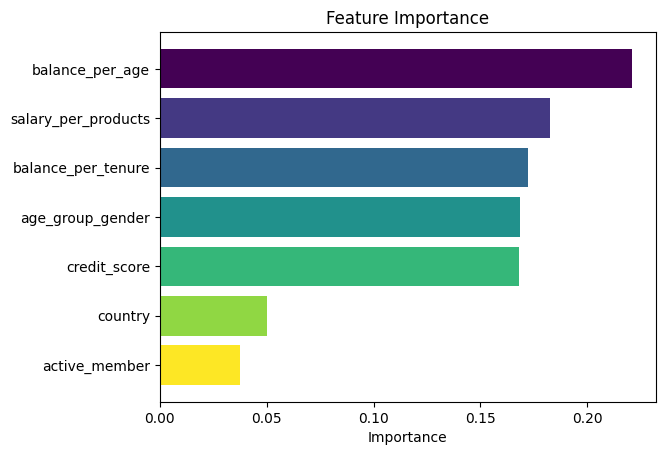

In [88]:
import matplotlib.pyplot as plt

# 특성 중요도 가져오기
importances = rf.feature_importances_
feature_names = x2.columns

# 중요도를 데이터프레임으로 변환하고 정렬
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 시각화
#plt.figure(figsize=(14, 6))
bars = plt.barh(importance_df['Feature'], importance_df['Importance'], color=plt.cm.viridis(np.linspace(0, 1, len(importance_df))))

# 정확한 수치 표시
#for bar in bars:
 #   width = bar.get_width()
  #  plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.4f}', va='center')

plt.xlabel('Importance')
#plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # y축을 위에서 아래로 정렬
plt.show()

# optim-rfe(Recursive Feature Elimination)

In [100]:
# x2 = df_normalized[df_normalized.columns.difference(['churn','country','active_member'])]
# y2 = df_normalized['churn']

In [101]:
# from collections import Counter
# from imblearn.over_sampling import SMOTE
# sm=SMOTE()
# x_data,y_data=sm.fit_resample(x2,y2)
# print(Counter(y_data))

In [102]:
# from sklearn.model_selection import train_test_split
# x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,
#                                                test_size=0.2,random_state=42)

In [103]:
# from sklearn.ensemble import RandomForestClassifier

# rf = RandomForestClassifier(random_state=42,
#                             bootstrap=False,
#                             max_depth=50,
#                             max_features='sqrt',
#                             min_samples_leaf=1,
#                             min_samples_split=2,
#                             n_estimators=376
#                             )
# rf.fit(x_train, y_train)

# y_train_pred = rf.predict(x_train)
# print(f'train accuracy:{accuracy_score(y_train,y_train_pred):.4f}')

# y_test_pred = rf.predict(x_test)
# print(f'test accuracy:{accuracy_score(y_test,y_test_pred):.4f}')

# # ======================================================================================

# y_pred_proba = rf.predict_proba(x_test)[:, 1]  # ROC 곡선과 AUC를 위한 확률 예측값

# # 1. 정밀도 (Precision)
# precision = precision_score(y_test, y_test_pred)
# print(f'Precision: {precision:.4f}')

# # 2. 재현율 (Recall)
# recall = recall_score(y_test, y_test_pred)
# print(f'Recall: {recall:.4f}')

# # 3. F1 점수
# f1 = f1_score(y_test, y_test_pred)
# print(f'F1 Score: {f1:.4f}')

# # 4. 혼동 행렬 (Confusion Matrix)
# cm = confusion_matrix(y_test, y_test_pred)
# print(f'Confusion Matrix:\n{cm}')

# # 5. ROC 곡선과 AUC
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
# auc = roc_auc_score(y_test, y_pred_proba)
# print(f'ROC AUC: {auc:.4f}')

# # ROC(Receiver Operating Characteristic) 곡선 플롯
# plt.figure()
# plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
# plt.plot([0, 1], [0, 1], 'k--')  # 대각선 기준선
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve')
# plt.legend(loc='lower right')
# plt.show()

# # 6. 교차 검증 (Cross Validation, Stratified KFold 사용)
# cv = StratifiedKFold(n_splits=5)
# cross_val_scores = cross_val_score(rf, x, y, cv=cv, scoring='accuracy')
# print(f'Cross-Validation Scores: {cross_val_scores}')
# print(f'Mean CV Accuracy: {cross_val_scores.mean():.4f}')

# # 모델 평가 결과로 데이터 프레임 만들기
# data1 = {
#     'Train Accuracy':[f'{accuracy_score(y_train,y_train_pred):.4f}'],
#     'Test Accuracy':[f'{accuracy_score(y_test,y_test_pred):.4f}'],
#     'Precision':[f'{precision:.4f}'],
#     'Recall':[f'{recall:.4f}'],
#     'F1 Score':[f'{f1:.4f}'],
#     'Confusion Matrix':[f'{cm}'],
#     'ROC AUC':[f'{auc:.4f}'],
#     'Cross-Validation Scores':[f'{cross_val_scores}'],
#     'Mean CV Accuracy':[f'{cross_val_scores.mean():.4f}']
# }

# df_rf = pd.DataFrame(data1)

In [105]:
# df_rf

In [106]:
# 필요없는 과정
# 특성을 너무 줄여도 안 좋은 것 같다
# 성능이 더 떨어진다

# optim-앙상블 모델

In [107]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# 기본 모델 정의
base_estimators = [
    ('rf', RandomForestClassifier(
        random_state=42,
        bootstrap=False,
        max_depth=50,
        max_features='sqrt',
        min_samples_leaf=1,
        min_samples_split=2,
        n_estimators=376
        )),
    ('xgb', XGBClassifier(
        random_state=42,
        colsample_bytree=0.8974056517708242,
        learning_rate=0.16079112793155764,
        max_depth=14,
        min_child_weight=1,
        n_estimators=366,
        subsample=0.7495966899423762
        )),
    ('catboost', CatBoostClassifier(
    random_state=42,
    learning_rate=0.46415888336127775,
    l2_leaf_reg=1.6681005372000592,
    iterations=500,
    depth=8,
    border_count=160
        ))
]

# 스태킹 모델 정의
stacking_model = StackingClassifier(estimators=base_estimators, final_estimator=LogisticRegression())

# 모델 훈련
stacking_model.fit(x_train, y_train)

# 예측 및 평가
y_pred = stacking_model.predict(x_test)
print("Stacking Model Accuracy:", accuracy_score(y_test, y_pred))


0:	learn: 0.6179303	total: 123ms	remaining: 1m 1s
1:	learn: 0.5841514	total: 138ms	remaining: 34.3s
2:	learn: 0.5729956	total: 175ms	remaining: 29s
3:	learn: 0.5650967	total: 196ms	remaining: 24.3s
4:	learn: 0.5590140	total: 210ms	remaining: 20.8s
5:	learn: 0.5478784	total: 221ms	remaining: 18.2s
6:	learn: 0.5411651	total: 234ms	remaining: 16.5s
7:	learn: 0.5352452	total: 247ms	remaining: 15.2s
8:	learn: 0.5309173	total: 261ms	remaining: 14.2s
9:	learn: 0.5264670	total: 275ms	remaining: 13.5s
10:	learn: 0.5149596	total: 286ms	remaining: 12.7s
11:	learn: 0.5085516	total: 301ms	remaining: 12.2s
12:	learn: 0.5032675	total: 317ms	remaining: 11.9s
13:	learn: 0.4994940	total: 332ms	remaining: 11.5s
14:	learn: 0.4965097	total: 346ms	remaining: 11.2s
15:	learn: 0.4928988	total: 364ms	remaining: 11s
16:	learn: 0.4886001	total: 380ms	remaining: 10.8s
17:	learn: 0.4849173	total: 398ms	remaining: 10.7s
18:	learn: 0.4817682	total: 415ms	remaining: 10.5s
19:	learn: 0.4748921	total: 431ms	remaining: 

train accuracy:1.0000
test accuracy:0.8274
Precision: 0.8117
Recall: 0.8410
F1 Score: 0.8261
Confusion Matrix:
[[1330  303]
 [ 247 1306]]
ROC AUC: 0.9103


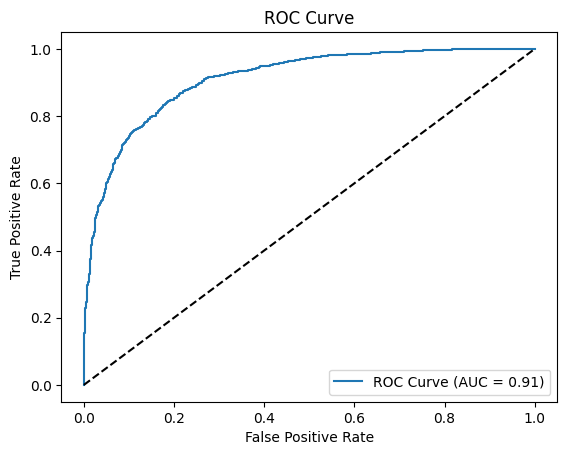

0:	learn: 0.6147181	total: 17.4ms	remaining: 8.71s
1:	learn: 0.5792375	total: 32.4ms	remaining: 8.06s
2:	learn: 0.5664769	total: 47.1ms	remaining: 7.81s
3:	learn: 0.5567062	total: 60.6ms	remaining: 7.52s
4:	learn: 0.5460758	total: 75.3ms	remaining: 7.45s
5:	learn: 0.5313048	total: 89.6ms	remaining: 7.38s
6:	learn: 0.5241848	total: 105ms	remaining: 7.38s
7:	learn: 0.5092235	total: 119ms	remaining: 7.35s
8:	learn: 0.5006880	total: 134ms	remaining: 7.29s
9:	learn: 0.4895232	total: 148ms	remaining: 7.26s
10:	learn: 0.4820747	total: 162ms	remaining: 7.2s
11:	learn: 0.4733726	total: 174ms	remaining: 7.07s
12:	learn: 0.4679050	total: 188ms	remaining: 7.04s
13:	learn: 0.4627127	total: 203ms	remaining: 7.06s
14:	learn: 0.4581269	total: 219ms	remaining: 7.09s
15:	learn: 0.4541206	total: 236ms	remaining: 7.13s
16:	learn: 0.4489550	total: 254ms	remaining: 7.21s
17:	learn: 0.4443092	total: 278ms	remaining: 7.45s
18:	learn: 0.4397167	total: 302ms	remaining: 7.63s
19:	learn: 0.4354016	total: 317ms	re

In [108]:
y_train_pred = stacking_model.predict(x_train)
print(f'train accuracy:{accuracy_score(y_train,y_train_pred):.4f}')

y_test_pred = stacking_model.predict(x_test)
print(f'test accuracy:{accuracy_score(y_test,y_test_pred):.4f}')

# ======================================================================================

y_pred_proba = stacking_model.predict_proba(x_test)[:, 1]  # ROC 곡선과 AUC를 위한 확률 예측값

# 1. 정밀도 (Precision)
precision = precision_score(y_test, y_test_pred)
print(f'Precision: {precision:.4f}')

# 2. 재현율 (Recall)
recall = recall_score(y_test, y_test_pred)
print(f'Recall: {recall:.4f}')

# 3. F1 점수
f1 = f1_score(y_test, y_test_pred)
print(f'F1 Score: {f1:.4f}')

# 4. 혼동 행렬 (Confusion Matrix)
cm = confusion_matrix(y_test, y_test_pred)
print(f'Confusion Matrix:\n{cm}')

# 5. ROC 곡선과 AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC: {auc:.4f}')

# ROC(Receiver Operating Characteristic) 곡선 플롯
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # 대각선 기준선
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 6. 교차 검증 (Cross Validation, Stratified KFold 사용)
cv = StratifiedKFold(n_splits=5)
cross_val_scores = cross_val_score(stacking_model, x_data, y_data, cv=cv, scoring='accuracy')
print(f'Cross-Validation Scores: {cross_val_scores}')
print(f'Mean CV Accuracy: {cross_val_scores.mean():.4f}')

# 모델 평가 결과로 데이터 프레임 만들기
data11 = {
    'Train Accuracy':[f'{accuracy_score(y_train,y_train_pred):.4f}'],
    'Test Accuracy':[f'{accuracy_score(y_test,y_test_pred):.4f}'],
    'Precision':[f'{precision:.4f}'],
    'Recall':[f'{recall:.4f}'],
    'F1 Score':[f'{f1:.4f}'],
    'Confusion Matrix':[f'{cm}'],
    'ROC AUC':[f'{auc:.4f}'],
    'Cross-Validation Scores':[f'{cross_val_scores}'],
    'Mean CV Accuracy':[f'{cross_val_scores.mean():.4f}']
}

df_stacking_model = pd.DataFrame(data11)